<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Forecasting - Previsões Para Séries Temporais - Modelo Base</font></b></strong>

<strong><b><font size="5">Modelo de Previsão de Capacidade - Método Naive</font></b></strong>

In [3]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime
#from pandas import Series

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

sklearn    0.24.0
matplotlib 3.3.3
numpy      1.19.5
pandas     1.1.5
Data Science Academy


## Definição do Problema de Negócio

Previsão do distanciamento social em Minas Gerais.

## Conjunto de Dados

Usaremos conjuntos de dados que mostram o distanciamento social em Minas Gerais. Os dados tem registros de 15/02/2020 a 29/01/2021.

Será fornecido 1 dataset com 2 colunas, data e distanciamento social.


In [5]:
# Carrega os dados
dataframe = pd.read_csv("./data/AIH.csv")
dataframe['Data'] = pd.to_datetime(dataframe.Data, format = '%d/%m/%Y')
dataframe = dataframe.set_index('Data')

In [7]:
# Dados
dataframe.head()

,QT_INTER
Data,
2020-02-15,31.6
2020-02-16,38.9
2020-02-17,24.0
2020-02-18,26.5
2020-02-19,27.8


In [8]:
dataframe.dtypes

QT_INTER    float64
dtype: object

In [9]:
dataframe.shape

(350, 1)

## Análise Exploratória dos Dados

Vamos preparar os dados e realizar diversas análises a fim de identificar possíveis padrões nos dados que ajudem mais tarde na criação do modelo preditivo.

In [10]:
# Refinamos os dados para o gráfico da série original

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dataframe['QT_INTER']

In [11]:
# Random seed 
np.random.seed(7)

In [12]:
# Refinamos os dados para o gráfico da série original

# A variável Count é nossa variável target (total de pessoas que usaram transporte)

target = dataframe['QT_INTER']

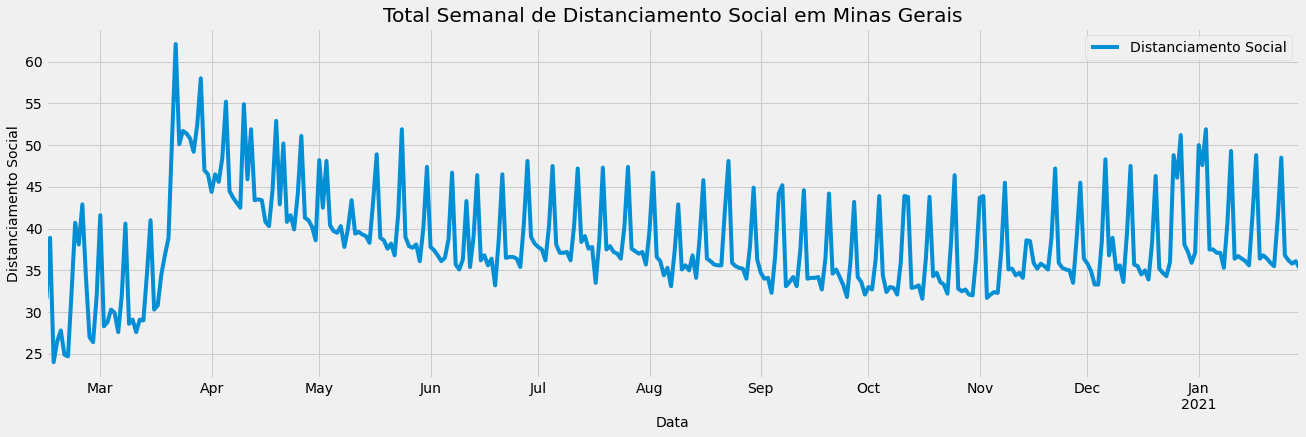

In [13]:
# Plot
target.plot(title = 'Total Semanal de Distanciamento Social em Minas Gerais', fontsize = 14, label = 'Distanciamento Social') 
plt.xlabel("Data") 
plt.ylabel("Distanciamento Social") 
plt.legend(loc = 'best') 
plt.show()

## Pré-Processamento

Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

In [14]:
# Os dados de treino serão divididos em dados de treino e teste.
# Observe que os registros são separados em ordem cronológica.
treino = dataframe.iloc[0:262]
teste = dataframe.iloc[262:]
print(len(treino), len(teste))

262 88


## Forecasting - Modelagem Preditiva Para Séries Temporais

Criaremos vários modelos para este problema que temos em mãos, aumentando o grau de complexidade a cada versão.

Mas toda caminhada deve começar com o primeiro passo. Vamos começar com o modelo preditivo mais simples que podemos criar.

### Método Naive

Técnica de estimativa na qual os dados reais do último período são usados como previsão desse período, sem ajustá-los ou tentar estabelecer fatores causais. É usado apenas para comparação com as previsões geradas pelas melhores técnicas (sofisticadas).

Naive = ingênuo

Não há técnica avançada aqui e apenas usamos como ponto de partida. Qualquer modelo mais avançado deve apresentar resultados superiores ao Método Naive.

In [15]:
# Criamos um array com os valores da variável target em treino
target = np.asarray(treino.QT_INTER)
target

array([31.6, 38.9, 24. , 26.5, 27.8, 24.9, 24.7, 32.4, 40.7, 38.1, 42.9,
       34.2, 27. , 26.4, 32. , 41.6, 28.3, 28.8, 30.3, 29.9, 27.6, 32.1,
       40.6, 28.6, 29.1, 27.6, 29.1, 29. , 34.6, 41. , 30.3, 30.8, 34.5,
       36.8, 38.9, 50.9, 62.1, 50.1, 51.7, 51.4, 50.8, 49.2, 52.4, 58. ,
       47. , 46.5, 44.4, 46.5, 45.6, 48.5, 55.2, 44.5, 43.7, 43.1, 42.5,
       54.9, 45.9, 51.9, 43.4, 43.5, 43.4, 40.8, 40.3, 44.7, 52.9, 42.9,
       50.2, 40.8, 41.6, 39.9, 44.1, 51.1, 41.3, 41. , 40.2, 38.6, 48.2,
       42.5, 48.1, 40.4, 39.7, 39.5, 40.3, 37.8, 40. , 43.4, 39.4, 39.6,
       39.3, 39.1, 38.3, 43.2, 48.9, 38.9, 38.6, 37.6, 38.2, 36.8, 41.8,
       51.9, 39. , 37.9, 37.7, 38.1, 36.1, 40.1, 47.4, 37.8, 37.4, 36.8,
       36.1, 36.5, 38.7, 46.7, 35.7, 35.1, 36.3, 43.3, 35.4, 39.1, 46.4,
       36.2, 36.8, 35.6, 36.4, 33.2, 38.7, 46.5, 36.5, 36.6, 36.6, 36.4,
       35.4, 40.6, 48.1, 39. , 38.2, 37.8, 37.5, 36.2, 40.3, 47.5, 38.1,
       37.1, 37.1, 37.2, 36.2, 40.4, 47.2, 38.4, 39

In [16]:
# Cria uma cópia dos dados de validação
predict = teste.copy()
predict.head()

,QT_INTER
Data,
2020-11-03,31.7
2020-11-04,32.1
2020-11-05,32.4
2020-11-06,32.3
2020-11-07,37.3


In [17]:
# Previsão

# Veja como o método é mesmo Naive
# Os dados reais (de treino) são usados como previsão para os dados de validação, 
# sem ajustá-los ou tentar estabelecer fatores causais.

# Sim, isso é o Método Naive!
predict['previsao_naive'] = target[len(target) - 1] 

In [18]:
# Colocamos lado a lado, valor real e valor "previsto"
predict[['QT_INTER', 'previsao_naive']].head()

,QT_INTER,previsao_naive
Data,,
2020-11-03,31.7,43.9
2020-11-04,32.1,43.9
2020-11-05,32.4,43.9
2020-11-06,32.3,43.9
2020-11-07,37.3,43.9


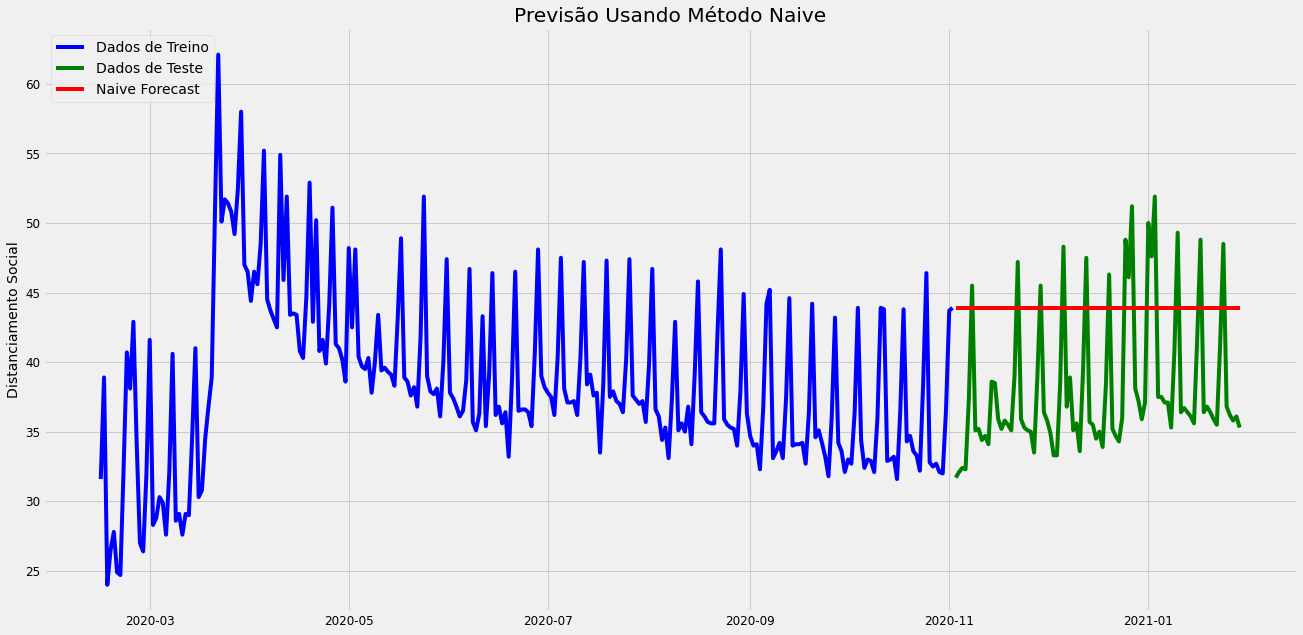

In [19]:
# Plot
plt.figure(figsize = (20, 10))
plt.title("Previsão Usando Método Naive") 
plt.plot(treino.index, treino['QT_INTER'], label = 'Dados de Treino', color = 'blue') 
plt.plot(teste.index, teste['QT_INTER'], label = 'Dados de Teste', color = 'green') 
plt.plot(predict.index, predict['previsao_naive'], label = 'Naive Forecast', color = 'red') 
plt.ylabel('Distanciamento Social')
plt.legend(loc = 'upper left') 
plt.show()

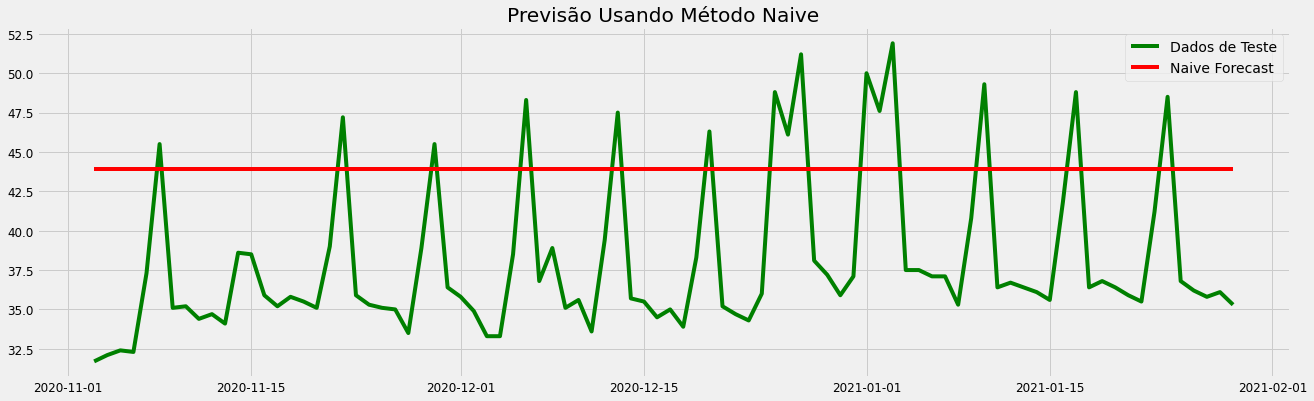

In [20]:
# Plot
plt.figure(figsize = (20, 6))
plt.title("Previsão Usando Método Naive") 
plt.plot(teste.index, teste['QT_INTER'], label = 'Dados de Teste', color = 'green') 
plt.plot(predict.index, predict['previsao_naive'], label = 'Naive Forecast', color = 'red') 
plt.legend(loc = 'best') 
plt.show()

Pronto! Temos a previsão da nossa série! Você apresentaria esse modelo ao investidor disposto a investir no seu negócio? Espero que não! 

Então vamos trabalhar para criar um modelo robusto nas próximas aulas. Mas antes, vamos calcular a taxa de erro do modelo. 

In [21]:
# Define valor real e valor previsto
y_true = predict.QT_INTER
y_pred = predict.previsao_naive

In [22]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse) 

7.632794079139398


Todas as aulas deste curso podem ser encontradas na timeline da Comunidade no portal da DSA: www.datascienceacademy.com.br

# Fim